In [ ]:
from sklearn import cluster,datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets as ds
energy = pd.read_csv('energy_dataset.csv');
weather = pd.read_csv('weather_features.csv')
weather

,time,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [ ]:
#刪除用不到的欄位
weather.drop(['weather_id','weather_main','weather_description','weather_description','weather_icon'],axis=1,inplace = True)
weather

,time,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0
178392,2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0
178393,2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0
178394,2018-12-31 22:00:00+01:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0


In [ ]:
#資料及含五大城市同一時間點的天氣
weather_avg=weather.groupby('time').mean()
weather_avg

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
time,,,,,,,,,,,
2015-01-01 00:00:00+01:00,272.491463,272.491463,272.491463,1016.4,82.4,2.0,135.2,0.0,0.0,0.0,0.0
2015-01-01 01:00:00+01:00,272.512700,272.512700,272.512700,1016.2,82.4,2.0,135.8,0.0,0.0,0.0,0.0
2015-01-01 02:00:00+01:00,272.099137,272.099137,272.099137,1016.8,82.0,2.4,119.0,0.0,0.0,0.0,0.0
2015-01-01 03:00:00+01:00,272.089469,272.089469,272.089469,1016.6,82.0,2.4,119.2,0.0,0.0,0.0,0.0
2015-01-01 04:00:00+01:00,272.145900,272.145900,272.145900,1016.6,82.0,2.4,118.4,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+01:00,284.470000,283.350000,285.550000,1029.2,73.6,1.4,151.4,0.0,0.0,0.0,0.0
2018-12-31 20:00:00+01:00,282.294000,280.950000,283.350000,1030.0,68.0,1.8,160.4,0.0,0.0,0.0,0.0
2018-12-31 21:00:00+01:00,280.850000,280.350000,281.350000,1029.8,71.4,2.6,226.0,0.0,0.0,0.0,0.0


In [ ]:
#同一時間點的用電量
total_load_actual = pd.DataFrame(energy,columns = ['time','total_load_actual'])
total_load_actual

,time,total_load_actual
0,2015-01-01 00:00:00+01:00,25385.0
1,2015-01-01 01:00:00+01:00,24382.0
2,2015-01-01 02:00:00+01:00,22734.0
3,2015-01-01 03:00:00+01:00,21286.0
4,2015-01-01 04:00:00+01:00,20264.0
...,...,...
35059,2018-12-31 19:00:00+01:00,30653.0
35060,2018-12-31 20:00:00+01:00,29735.0
35061,2018-12-31 21:00:00+01:00,28071.0
35062,2018-12-31 22:00:00+01:00,25801.0


In [ ]:
#將空值補零
df_use = pd.merge(weather_avg,total_load_actual,on=['time'])
df_use.total_load_actual.fillna(value = 0,inplace=True)
print(df_use.isna().sum())
df_use

time                 0
temp                 0
temp_min             0
temp_max             0
pressure             0
humidity             0
wind_speed           0
wind_deg             0
rain_1h              0
rain_3h              0
snow_3h              0
clouds_all           0
total_load_actual    0
dtype: int64


,time,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,total_load_actual
0,2015-01-01 00:00:00+01:00,272.491463,272.491463,272.491463,1016.4,82.4,2.0,135.2,0.0,0.0,0.0,0.0,25385.0
1,2015-01-01 01:00:00+01:00,272.512700,272.512700,272.512700,1016.2,82.4,2.0,135.8,0.0,0.0,0.0,0.0,24382.0
2,2015-01-01 02:00:00+01:00,272.099137,272.099137,272.099137,1016.8,82.0,2.4,119.0,0.0,0.0,0.0,0.0,22734.0
3,2015-01-01 03:00:00+01:00,272.089469,272.089469,272.089469,1016.6,82.0,2.4,119.2,0.0,0.0,0.0,0.0,21286.0
4,2015-01-01 04:00:00+01:00,272.145900,272.145900,272.145900,1016.6,82.0,2.4,118.4,0.0,0.0,0.0,0.0,20264.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,284.470000,283.350000,285.550000,1029.2,73.6,1.4,151.4,0.0,0.0,0.0,0.0,30653.0
35060,2018-12-31 20:00:00+01:00,282.294000,280.950000,283.350000,1030.0,68.0,1.8,160.4,0.0,0.0,0.0,0.0,29735.0
35061,2018-12-31 21:00:00+01:00,280.850000,280.350000,281.350000,1029.8,71.4,2.6,226.0,0.0,0.0,0.0,0.0,28071.0
35062,2018-12-31 22:00:00+01:00,279.718000,278.750000,280.750000,1030.2,70.0,2.8,230.0,0.0,0.0,0.0,0.0,25801.0


In [ ]:
#z-score標準化
from sklearn import preprocessing as pp
df_zscore=pd.DataFrame(pp.scale(df_use.drop('time',1)),columns=list(df_use.drop('time',1).columns))
df_zscore

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,total_load_actual
0,-2.367278,-2.233327,-2.484864,-0.019986,0.952521,-0.344346,-0.546409,-0.361436,-0.114789,-0.047937,-1.429373,-0.703787
1,-2.364353,-2.230345,-2.482035,-0.020060,0.952521,-0.344346,-0.535973,-0.361436,-0.114789,-0.047937,-1.429373,-0.918838
2,-2.421310,-2.288416,-2.537119,-0.019837,0.925657,-0.049737,-0.828184,-0.361436,-0.114789,-0.047937,-1.429373,-1.272182
3,-2.422641,-2.289773,-2.538407,-0.019911,0.925657,-0.049737,-0.824705,-0.361436,-0.114789,-0.047937,-1.429373,-1.582644
4,-2.414870,-2.281850,-2.530891,-0.019911,0.925657,-0.049737,-0.838620,-0.361436,-0.114789,-0.047937,-1.429373,-1.801768
...,...,...,...,...,...,...,...,...,...,...,...,...
35059,-0.717561,-0.708625,-0.745547,-0.015231,0.361518,-0.786260,-0.264634,-0.361436,-0.114789,-0.047937,-1.429373,0.425711
35060,-1.017245,-1.045621,-1.038573,-0.014934,-0.014574,-0.491650,-0.108093,-0.361436,-0.114789,-0.047937,-1.429373,0.228885
35061,-1.216117,-1.129870,-1.304961,-0.015008,0.213767,0.097568,1.032921,-0.361436,-0.114789,-0.047937,-1.429373,-0.127889
35062,-1.372019,-1.354534,-1.384877,-0.014860,0.119744,0.244872,1.102495,-0.361436,-0.114789,-0.047937,-1.429373,-0.614594


In [ ]:
#各變數間線性相關程度
df_zscore.corr()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,total_load_actual
temp,1.000000,0.987921,0.985426,-0.023196,-0.674630,0.100628,-0.115236,-0.079628,-0.006729,-0.076923,-0.215047,0.203250
temp_min,0.987921,1.000000,0.948895,-0.020708,-0.671655,0.099931,-0.110661,-0.076988,0.006493,-0.069789,-0.204996,0.203035
temp_max,0.985426,0.948895,1.000000,-0.025520,-0.656198,0.090485,-0.122896,-0.082730,-0.021103,-0.083760,-0.222671,0.198847
pressure,-0.023196,-0.020708,-0.025520,1.000000,-0.005309,0.015279,0.033004,0.048162,-0.002400,-0.001260,0.020061,-0.002005
humidity,-0.674630,-0.671655,-0.656198,-0.005309,1.000000,-0.341188,0.020164,0.104490,0.007972,-0.004017,0.319001,-0.358287
wind_speed,0.100628,0.099931,0.090485,0.015279,-0.341188,1.000000,0.361267,0.182795,-0.020161,0.060860,0.283796,0.190637
wind_deg,-0.115236,-0.110661,-0.122896,0.033004,0.020164,0.361267,1.000000,0.084949,0.007046,0.045820,0.118165,-0.087763
rain_1h,-0.079628,-0.076988,-0.082730,0.048162,0.104490,0.182795,0.084949,1.000000,0.004972,0.076483,0.328181,0.016904
rain_3h,-0.006729,0.006493,-0.021103,-0.002400,0.007972,-0.020161,0.007046,0.004972,1.000000,-0.002880,0.027317,-0.006757
snow_3h,-0.076923,-0.069789,-0.083760,-0.001260,-0.004017,0.060860,0.045820,0.076483,-0.002880,1.000000,0.054441,-0.011998


In [ ]:
#temp temp_min temp_max高度線性相關，只保留temp_min
df_zscore.drop(['temp_min','temp_max'],1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
x_zscore=df_zscore.drop(['total_load_actual'],1)
x_unz=df_use.drop(['total_load_actual','temp_min','temp_max','time'],1)
x_unz

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,272.491463,1016.4,82.4,2.0,135.2,0.0,0.0,0.0,0.0
1,272.512700,1016.2,82.4,2.0,135.8,0.0,0.0,0.0,0.0
2,272.099137,1016.8,82.0,2.4,119.0,0.0,0.0,0.0,0.0
3,272.089469,1016.6,82.0,2.4,119.2,0.0,0.0,0.0,0.0
4,272.145900,1016.6,82.0,2.4,118.4,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
35059,284.470000,1029.2,73.6,1.4,151.4,0.0,0.0,0.0,0.0
35060,282.294000,1030.0,68.0,1.8,160.4,0.0,0.0,0.0,0.0
35061,280.850000,1029.8,71.4,2.6,226.0,0.0,0.0,0.0,0.0
35062,279.718000,1030.2,70.0,2.8,230.0,0.0,0.0,0.0,0.0


In [ ]:
#特徵選取
from sklearn import feature_selection as fs
skb = fs.SelectKBest(fs.f_regression, k=2)
skb.fit(x_zscore,df_use.total_load_actual)

SelectKBest(k=2, score_func=<function f_regression at 0x7f4ff90f3440>)

In [ ]:
x_skb = skb.transform(x_zscore)
x_skb[:3]

array([[-2.36727774,  0.95252051],
       [-2.36435285,  0.95252051],
       [-2.42130982,  0.92565676]])

In [ ]:
x_zscore

,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,-2.367278,-0.019986,0.952521,-0.344346,-0.546409,-0.361436,-0.114789,-0.047937,-1.429373
1,-2.364353,-0.020060,0.952521,-0.344346,-0.535973,-0.361436,-0.114789,-0.047937,-1.429373
2,-2.421310,-0.019837,0.925657,-0.049737,-0.828184,-0.361436,-0.114789,-0.047937,-1.429373
3,-2.422641,-0.019911,0.925657,-0.049737,-0.824705,-0.361436,-0.114789,-0.047937,-1.429373
4,-2.414870,-0.019911,0.925657,-0.049737,-0.838620,-0.361436,-0.114789,-0.047937,-1.429373
...,...,...,...,...,...,...,...,...,...
35059,-0.717561,-0.015231,0.361518,-0.786260,-0.264634,-0.361436,-0.114789,-0.047937,-1.429373
35060,-1.017245,-0.014934,-0.014574,-0.491650,-0.108093,-0.361436,-0.114789,-0.047937,-1.429373
35061,-1.216117,-0.015008,0.213767,0.097568,1.032921,-0.361436,-0.114789,-0.047937,-1.429373
35062,-1.372019,-0.014860,0.119744,0.244872,1.102495,-0.361436,-0.114789,-0.047937,-1.429373


In [ ]:
#pca
from sklearn import feature_selection as fs
from sklearn import decomposition as dc
pca = dc.PCA(n_components=0.8)
pcs = pca.fit_transform(x_zscore,df_use.total_load_actual)
df_pca = pd.DataFrame(pcs)
df_pca

,0,1,2,3,4,5
0,1.086988,-1.820135,-0.609121,0.013113,-0.581112,0.616640
1,1.087001,-1.815124,-0.610816,0.012714,-0.586774,0.618929
2,1.051410,-1.746006,-0.574273,0.008819,-0.464720,0.540380
3,1.052733,-1.744799,-0.575159,0.008597,-0.467066,0.541475
4,1.046027,-1.749156,-0.571329,0.009266,-0.457216,0.536609
...,...,...,...,...,...,...
35059,-0.154979,-1.470789,-0.401259,0.059120,-0.306479,0.475516
35060,-0.185941,-1.145167,-0.476971,0.033496,-0.470324,0.563119
35061,0.238357,-0.383749,-0.767790,-0.040370,-1.298283,0.867045
35062,0.280693,-0.256647,-0.807472,-0.052878,-1.384336,0.906671


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
print(x_zscore.shape)
print(x_skb.shape)
print(df_pca.shape)
print(df_use.total_load_actual.shape)

(35064, 9)
(35064, 2)
(35064, 6)
(35064,)


In [ ]:
#線性回歸
x_train, x_test, y_train, y_test = train_test_split(x_zscore, df_use.total_load_actual, random_state=10)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
AdjustR2=1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print('以9個天氣特徵做')
print('訓練的R2:',model.score(x_train,y_train))
print('R2: ', r2)
print('AdjustR2:',AdjustR2)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test, y_pred))

print()
x_train, x_test, y_train, y_test = train_test_split(x_skb, df_use.total_load_actual, random_state=10)
model2 = LinearRegression()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
r2_t=model2.score(x_train,y_train)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
AdjustR2=1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print('以selectKBest選取特徵做')
print('訓練的R2:',model2.score(x_train,y_train))
print('R2: ', r2)
print('AdjustR2:',AdjustR2)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test, y_pred))

print()
x_train, x_test, y_train, y_test = train_test_split(df_pca, df_use.total_load_actual, random_state=10)
model3 = LinearRegression()
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
r2_t=model3.score(x_train,y_train)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
AdjustR2=1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print('以pca 降維後保存80%訊息做')
print('訓練的R2:',model3.score(x_train,y_train))
print('R2: ', r2)
print('AdjustR2:',AdjustR2)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test, y_pred))


以9個天氣特徵做
訓練的R2: 0.16520609606812442
R2:  0.16287405210014183
AdjustR2: 0.1620135982934836
MSE:  18265231.662778843
MAE:  3481.518940657437

以selectKBest選取特徵做
訓練的R2: 0.13154492591169642
R2:  0.1293932561419453
AdjustR2: 0.12919455552711978
MSE:  18995748.374111082
MAE:  3583.496555361532

以pca 降維後保存80%訊息做
訓練的R2: 0.11389601741725563
R2:  0.11681385666385524
AdjustR2: 0.11620886558496302
MSE:  19270217.999885295
MAE:  3598.9019883211813


[11:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2: 0.32351464993488377
訓練的R2: 0.6228084958298776
MAE:  3024.5153399719998


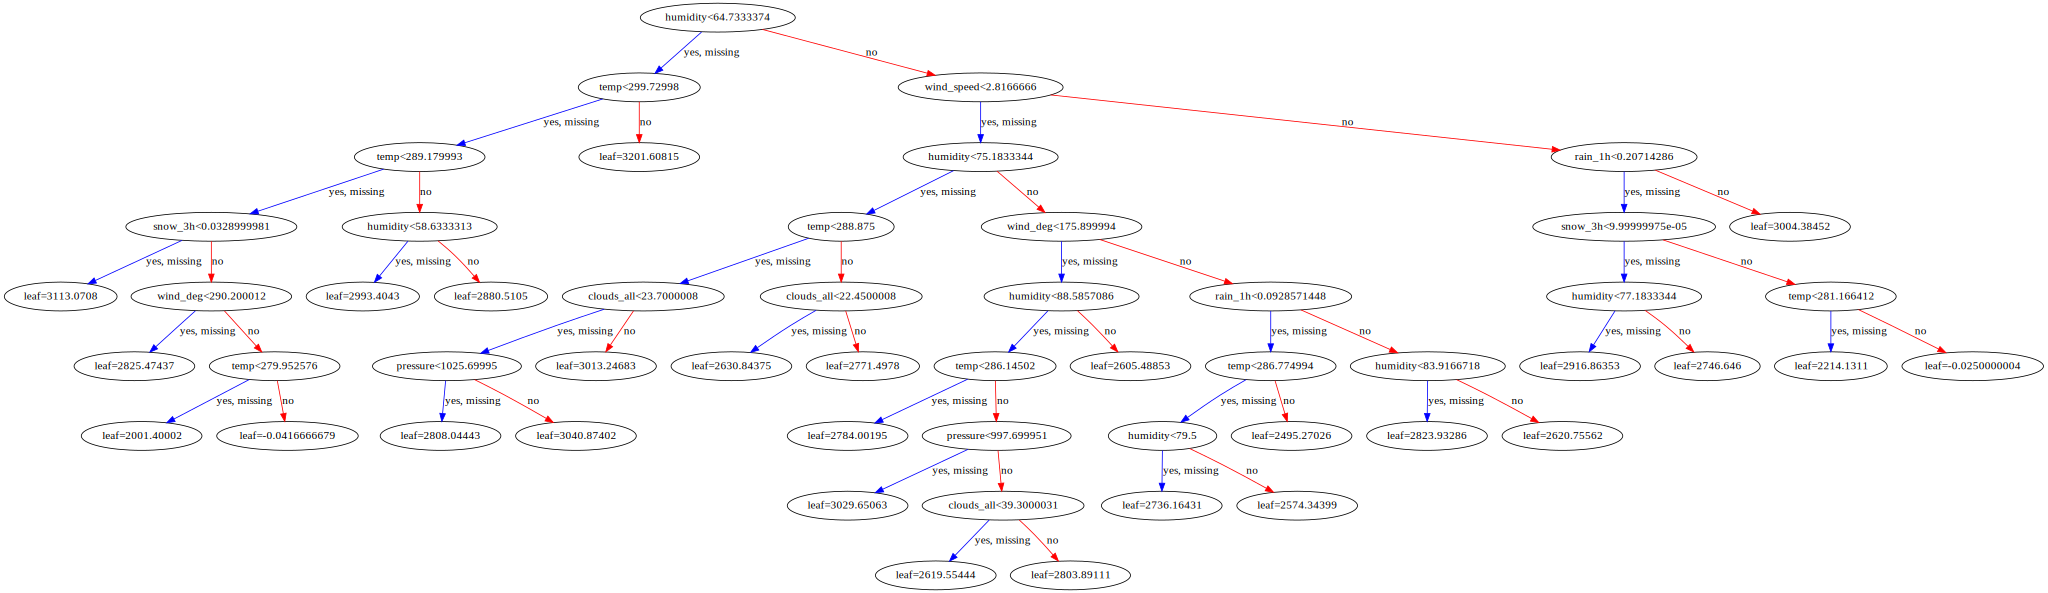

In [ ]:
import xgboost as xgb
x_train, x_test, y_train, y_test = train_test_split(x_unz, df_use.total_load_actual,test_size=0.2, random_state=10)
model_xgb= xgb.XGBRegressor(max_depth=10,learning_rate=0.1,n_estimators=100)
model_xgb.fit(x_train,y_train)
y_pred=model_xgb.predict(x_test)
print('R2:',model_xgb.score(x_test, y_test))
print('訓練的R2:',model_xgb.score(x_train, y_train))
print('MAE: ',mean_absolute_error(y_test, y_pred))
xgb.to_graphviz(model_xgb)

[0.07109213 0.07264964 0.22087173 0.07706609 0.07493385 0.08772983
 0.08382383 0.21930642 0.09252643]


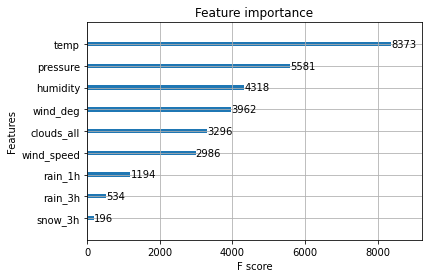

In [ ]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance
# feature importance
print(model_xgb.feature_importances_)
# plot feature importance
plot_importance(model_xgb)
pyplot.show()

[12:05:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2: 0.278816852028158
訓練的R2: 0.33305774526478693
MAE:  3177.4296507379154


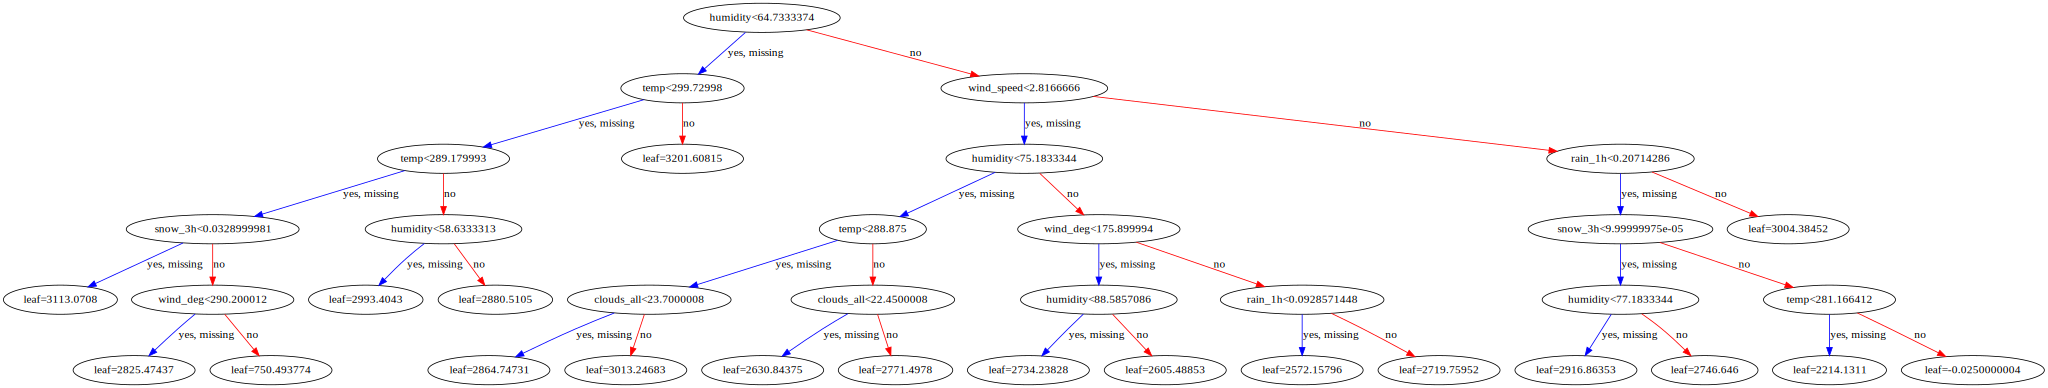

In [ ]:
model_xgb= xgb.XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=100)
model_xgb.fit(x_train,y_train)
y_pred=model_xgb.predict(x_test)
print('R2:',model_xgb.score(x_test, y_test))
print('訓練的R2:',model_xgb.score(x_train, y_train))
print('MAE: ',mean_absolute_error(y_test, y_pred))
xgb.to_graphviz(model_xgb)

[0.10708021 0.05555235 0.38859823 0.07373312 0.07072092 0.06783862
 0.063976   0.08656046 0.08594014]


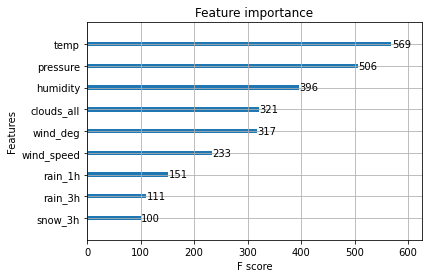

In [ ]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance
# feature importance
print(model_xgb.feature_importances_)
# plot feature importance
plot_importance(model_xgb)
pyplot.show()

In [ ]:
#線性結果低決定新增欄位看是否能改善 加入:weekend,period
#做出weekend,period
day=[0,0,1,1,0,0,0]
timename=[0,1,2,3]
day_of_week=[]
period=[]
def add_day_of_week(arr1,arr2,arr3):
    for n in range(0,len(arr1),24*len(arr2)):
        for i in range(len(arr2)):
            for j in range(0,24):
                if len(arr3)>= len(arr1):
                    return arr3
                else:
                    arr3.append(arr2[i])
    return arr3
def add_period(arr1,arr2,arr3):
    for n in range(0,len(arr1),6*len(arr2)):
        for i in range(len(arr2)):
            for j in range(0,6):
                if len(arr3)>= len(arr1):
                    return arr3
                else:
                    arr3.append(arr2[i])
    return arr3
df_weekend=pd.DataFrame(add_day_of_week(df_zscore,day,day_of_week),columns=['weekend'])
df_period=pd.DataFrame(add_period(df_zscore,timename,period),columns=['period'])
print('0為平日 1為假日\n')
df_weekend
print('0為凌晨0~5點\n 1為早上6~11\n 2為下午12~17點\n 3為晚上18~23點\n',)
df_period

0為平日 1為假日

0為凌晨0~5點
 1為早上6~11
 2為下午12~17點
 3為晚上18~23點



,period
0,0
1,0
2,0
3,0
4,0
...,...
35059,3
35060,3
35061,3
35062,3


In [ ]:
x_zscore_new = pd.concat([x_zscore,df_weekend,df_period],axis=1)
x_zscore_new

,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weekend,period
0,-2.367278,-0.019986,0.952521,-0.344346,-0.546409,-0.361436,-0.114789,-0.047937,-1.429373,0,0
1,-2.364353,-0.020060,0.952521,-0.344346,-0.535973,-0.361436,-0.114789,-0.047937,-1.429373,0,0
2,-2.421310,-0.019837,0.925657,-0.049737,-0.828184,-0.361436,-0.114789,-0.047937,-1.429373,0,0
3,-2.422641,-0.019911,0.925657,-0.049737,-0.824705,-0.361436,-0.114789,-0.047937,-1.429373,0,0
4,-2.414870,-0.019911,0.925657,-0.049737,-0.838620,-0.361436,-0.114789,-0.047937,-1.429373,0,0
...,...,...,...,...,...,...,...,...,...,...,...
35059,-0.717561,-0.015231,0.361518,-0.786260,-0.264634,-0.361436,-0.114789,-0.047937,-1.429373,0,3
35060,-1.017245,-0.014934,-0.014574,-0.491650,-0.108093,-0.361436,-0.114789,-0.047937,-1.429373,0,3
35061,-1.216117,-0.015008,0.213767,0.097568,1.032921,-0.361436,-0.114789,-0.047937,-1.429373,0,3
35062,-1.372019,-0.014860,0.119744,0.244872,1.102495,-0.361436,-0.114789,-0.047937,-1.429373,0,3


In [ ]:
#要做回歸要把轉成虛擬變數
dummy=pd.get_dummies(x_zscore_new.period,prefix='period')
dummy
x_zscore_new.drop(['period'],1,inplace=True)
feature_all_z = pd.concat([x_zscore_new,dummy],axis=1)
print(feature_all_z.corr())
feature_all_z
feature_all = pd.concat([x_unz,df_weekend,dummy],axis=1)
feature_all

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


                temp  pressure  humidity  wind_speed  wind_deg   rain_1h  \
temp        1.000000 -0.023196 -0.674630    0.100628 -0.115236 -0.079628   
pressure   -0.023196  1.000000 -0.005309    0.015279  0.033004  0.048162   
humidity   -0.674630 -0.005309  1.000000   -0.341188  0.020164  0.104490   
wind_speed  0.100628  0.015279 -0.341188    1.000000  0.361267  0.182795   
wind_deg   -0.115236  0.033004  0.020164    0.361267  1.000000  0.084949   
rain_1h    -0.079628  0.048162  0.104490    0.182795  0.084949  1.000000   
rain_3h    -0.006729 -0.002400  0.007972   -0.020161  0.007046  0.004972   
snow_3h    -0.076923 -0.001260 -0.004017    0.060860  0.045820  0.076483   
clouds_all -0.215047  0.020061  0.319001    0.283796  0.118165  0.328181   
weekend    -0.000219  0.026394  0.003954    0.013772  0.006065  0.024275   
period_0   -0.235185 -0.003216  0.393888   -0.226573  0.081958 -0.025331   
period_1   -0.159232  0.017431  0.238024   -0.177936 -0.089238 -0.019790   
period_2    

,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weekend,period_0,period_1,period_2,period_3
0,272.491463,1016.4,82.4,2.0,135.2,0.0,0.0,0.0,0.0,0,1,0,0,0
1,272.512700,1016.2,82.4,2.0,135.8,0.0,0.0,0.0,0.0,0,1,0,0,0
2,272.099137,1016.8,82.0,2.4,119.0,0.0,0.0,0.0,0.0,0,1,0,0,0
3,272.089469,1016.6,82.0,2.4,119.2,0.0,0.0,0.0,0.0,0,1,0,0,0
4,272.145900,1016.6,82.0,2.4,118.4,0.0,0.0,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,284.470000,1029.2,73.6,1.4,151.4,0.0,0.0,0.0,0.0,0,0,0,0,1
35060,282.294000,1030.0,68.0,1.8,160.4,0.0,0.0,0.0,0.0,0,0,0,0,1
35061,280.850000,1029.8,71.4,2.6,226.0,0.0,0.0,0.0,0.0,0,0,0,0,1
35062,279.718000,1030.2,70.0,2.8,230.0,0.0,0.0,0.0,0.0,0,0,0,0,1


In [ ]:
#特徵選取
#SelectKBest 選4
skb = fs.SelectKBest(fs.f_regression, k=4)
skb.fit(feature_all_z,df_use.total_load_actual)
x_skb = pd.DataFrame(skb.transform(feature_all_z))
x_skb

,0,1,2,3
0,0.952521,0.0,1.0,0.0
1,0.952521,0.0,1.0,0.0
2,0.925657,0.0,1.0,0.0
3,0.925657,0.0,1.0,0.0
4,0.925657,0.0,1.0,0.0
...,...,...,...,...
35059,0.361518,0.0,0.0,0.0
35060,-0.014574,0.0,0.0,0.0
35061,0.213767,0.0,0.0,0.0
35062,0.119744,0.0,0.0,0.0


In [ ]:
#以線性相關程度挑選:
x_pick=pd.DataFrame(feature_all_z,columns=['temp','humidity','weekend','period_0','period_1','period_2','period_3'])
x_pick

,temp,humidity,weekend,period_0,period_1,period_2,period_3
0,-2.367278,0.952521,0,1,0,0,0
1,-2.364353,0.952521,0,1,0,0,0
2,-2.421310,0.925657,0,1,0,0,0
3,-2.422641,0.925657,0,1,0,0,0
4,-2.414870,0.925657,0,1,0,0,0
...,...,...,...,...,...,...,...
35059,-0.717561,0.361518,0,0,0,0,1
35060,-1.017245,-0.014574,0,0,0,0,1
35061,-1.216117,0.213767,0,0,0,0,1
35062,-1.372019,0.119744,0,0,0,0,1


In [ ]:
#pca
pca = dc.PCA(n_components=0.8)#保障降維後保持80%訊息
pcs = pca.fit_transform(feature_all_z,df_use.total_load_actual)
df_pca = pd.DataFrame(pcs)
df_pca

,0,1,2,3,4,5,6
0,1.416847,-1.673947,-0.743597,-0.025086,0.532892,0.481711,0.395568
1,1.416292,-1.669204,-0.746608,-0.025485,0.538572,0.483029,0.399486
2,1.367702,-1.603325,-0.680916,-0.028577,0.413910,0.426849,0.208775
3,1.368861,-1.601972,-0.682306,-0.028816,0.416190,0.427506,0.209986
4,1.362786,-1.607168,-0.676369,-0.028064,0.406658,0.424510,0.205278
...,...,...,...,...,...,...,...
35059,0.030425,-1.443615,-0.471602,0.026923,0.263247,0.403151,0.659631
35060,-0.046356,-1.130754,-0.584224,0.000459,0.423877,0.460552,0.623646
35061,0.274208,-0.332857,-1.053151,-0.076623,1.226014,0.614782,0.862153
35062,0.297492,-0.201904,-1.110747,-0.089837,1.307804,0.637954,0.840054


In [ ]:
print(feature_all_z.shape)
print(x_skb.shape)
print(x_pick.shape)
print(df_pca.shape)


(35064, 14)
(35064, 4)
(35064, 7)
(35064, 7)


In [ ]:
#線性回歸
x_train, x_test, y_train, y_test = train_test_split(feature_all_z, df_use.total_load_actual,test_size=0.2, random_state=10)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_t=model.score(x_train,y_train)
r2 = r2_score(y_test, y_pred)
AdjustR2=1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print('以所有特徵做')
print('訓練的R2:',model.score(x_train,y_train))
print('R2: ', r2)
print('AdjustR2:',AdjustR2)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test, y_pred))
print()

x_train, x_test, y_train, y_test = train_test_split(x_skb, df_use.total_load_actual,test_size=0.2, random_state=10)
model2 = LinearRegression()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
r2_t=model2.score(x_train,y_train)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
AdjustR2=1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print('以selectKBest選特徵做')
print('訓練的R2:',model2.score(x_train,y_train))
print('R2: ', r2)
print('AdjustR2:',AdjustR2)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test, y_pred))
# print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))
print()

x_train, x_test, y_train, y_test = train_test_split(x_pick, df_use.total_load_actual,test_size=0.2, random_state=10)
model3 = LinearRegression()
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
r2_t=model3.score(x_train,y_train)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
AdjustR2=1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print('以線性相關選出特徵做:')
print('訓練的R2:',model3.score(x_train,y_train))
print('R2: ', r2)
print('AdjustR2:',AdjustR2)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test, y_pred))
# print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))
print()

x_train, x_test, y_train, y_test = train_test_split(df_pca, df_use.total_load_actual,test_size=0.2, random_state=10)
model4 = LinearRegression()
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)
r2_t=model4.score(x_train,y_train)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
AdjustR2=1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print('以pca做')
print('訓練的R2:',model4.score(x_train,y_train))
print('R2: ', r2)
print('AdjustR2:',AdjustR2)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test, y_pred))
# print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

以所有特徵做
訓練的R2: 0.4684432837160488
R2:  0.4698773909698809
AdjustR2: 0.46881684273804014
MSE:  11405670.630250217
MAE:  2577.2926927494777

以selectKBest選特徵做
訓練的R2: 0.4618286064748699
R2:  0.4602269474588512
AdjustR2: 0.4599188578169898
MSE:  11613301.427819893
MAE:  2597.4322982251306

以線性相關選出特徵做:
訓練的R2: 0.46315536951264435
R2:  0.461134975496742
AdjustR2: 0.4605964951010928
MSE:  11593765.062935997
MAE:  2599.6515806005686

以pca做
訓練的R2: 0.1482210740866129
R2:  0.15645062763538864
AdjustR2: 0.15560768036821493
MSE:  18149096.33668995
MAE:  3471.5420986658883


In [ ]:
#knn regression
from sklearn.neighbors import KNeighborsRegressor
x_train, x_test, y_train, y_test = train_test_split(feature_all_z, df_use.total_load_actual, random_state=10)
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(x_train, y_train)
y_pred = knr.predict(x_test)
r2 = r2_score(y_test, y_pred)
r2_t=knr.score(x_train,y_train)
mse = mean_squared_error(y_test, y_pred)
print('以所有特徵做:')
print('R2: ', r2)
print('MSE: ', mse)
# print('MAPE: ',mean_absolute_percentage_error(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test, y_pred))
print()
x_train, x_test, y_train, y_test = train_test_split(x_skb, df_use.total_load_actual, random_state=10)
knr2 = KNeighborsRegressor(n_neighbors=3)
knr2.fit(x_train, y_train)
y_pred = knr2.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('以selectKBest選特徵做:')
print('R2: ', r2)
print('MSE: ', mse)
# print('MAPE: ',mean_absolute_percentage_error(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test, y_pred))
print()
x_train, x_test, y_train, y_test = train_test_split(x_pick, df_use.total_load_actual, random_state=10)
knr3 = KNeighborsRegressor(n_neighbors=3)
knr3.fit(x_train, y_train)
y_pred = knr3.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('以線性相關選出特徵做:')
print('R2: ', r2)
print('MSE: ', mse)
# print('MAPE: ',mean_absolute_percentage_error(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test, y_pred))
print()
x_train, x_test, y_train, y_test = train_test_split(df_pca, df_use.total_load_actual, random_state=10)
knr4 = KNeighborsRegressor(n_neighbors=3)
knr4.fit(x_train, y_train)
y_pred = knr4.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('以pca選出特徵做:')
print('R2: ', r2)
print('MSE: ', mse)
print('MAE: ',mean_absolute_error(y_test, y_pred))

以所有特徵做:
R2:  0.46713044136327153
MSE:  11626668.55442746
MAE:  2484.229865389003

以selectKBest選特徵做:
R2:  0.3103410809366607
MSE:  15047651.97709585
MAE:  2942.8864172180397

以線性相關選出特徵做:
R2:  0.38184966469602943
MSE:  13487407.84475372
MAE:  2692.3870256293258

以pca選出特徵做:
R2:  0.03406595465441531
MSE:  21075692.55673435
MAE:  3586.3230283671764


In [ ]:
# #Lasso
# x_L=pd.DataFrame(df_use.drop(['temp','time','temp_max','total_load_actual'],1))
# x_L=pd.concat([x_L,df_weekend,dummy],axis=1)
# x_L

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,temp_min,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weekend,period_0,period_1,period_2,period_3
0,268.900,986.0,70.0,1.0,185.5,0.0,0.0,0.0,0.0,0,1,0,0,0
1,268.900,986.0,70.0,1.0,185.5,0.0,0.0,0.0,0.0,0,1,0,0,0
2,267.936,986.5,71.0,0.5,148.0,0.0,0.0,0.0,0.0,0,1,0,0,0
3,267.936,986.5,71.0,0.5,148.0,0.0,0.0,0.0,0.0,0,1,0,0,0
4,267.936,986.5,71.0,0.5,148.0,0.0,0.0,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,285.150,1028.0,62.0,2.0,140.0,0.0,0.0,0.0,0.0,0,0,0,0,1
35060,282.150,1029.0,71.0,1.0,242.0,0.0,0.0,0.0,0.0,0,0,0,0,1
35061,281.150,1029.0,81.0,3.0,300.0,0.0,0.0,0.0,0.0,0,0,0,0,1
35062,279.150,1029.0,81.0,2.0,310.0,0.0,0.0,0.0,0.0,0,0,0,0,1


In [ ]:
# from sklearn.linear_model import Lasso
# x_train, x_test, y_train, y_test = train_test_split(x_L, df_use.total_load_actual, random_state=10)
# lasso = Lasso().fit(x_train, y_train)
# print('R2:',lasso.score(x_test, y_test))
# print('訓練的R2:',lasso.score(x_train, y_train))
# print(f'Number of features used: {np.sum(lasso.coef_!=0)}')
# print('MAPE: ',mean_absolute_percentage_error(y_test, y_pred))
# print('MAE: ',mean_absolute_error(y_test, y_pred))

R2: 0.45697778922240817
訓練的R2: 0.4637868939659199
Number of features used: 12
MAPE:  1.3029990215528274e+17
MAE:  3417.0606890257814


In [ ]:
# lasso001 = Lasso(alpha=0.01).fit(x_train, y_train)
# print('R2:',lasso001.score(x_test, y_test))
# print('訓練的R2:',lasso001.score(x_train, y_train))
# print(f'Number of features used: {np.sum(lasso001.coef_!=0)}')
# print('MAPE: ',mean_absolute_percentage_error(y_test, y_pred))
# print('MAE: ',mean_absolute_error(y_test, y_pred))

R2: 0.45760182068844746
訓練的R2: 0.4639689179808947
Number of features used: 14
MAPE:  1.3029990215528274e+17
MAE:  3417.0606890257814


In [ ]:
import xgboost as xgb
x_train, x_test, y_train, y_test = train_test_split(feature_all, df_use.total_load_actual, random_state=10)
model_xgb2= xgb.XGBRegressor(max_depth=7,learning_rate=0.1,n_estimators=100)
model_xgb2.fit(x_train,y_train)
y_pred=model_xgb2.predict(x_test)
print('R2:',model_xgb2.score(x_test, y_test))
print('訓練的R2:',model_xgb2.score(x_train, y_train))
print('MAE: ',mean_absolute_error(y_test, y_pred))

[12:51:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2: 0.579204016167061
訓練的R2: 0.6700313810293452
MAE:  2234.6858352219


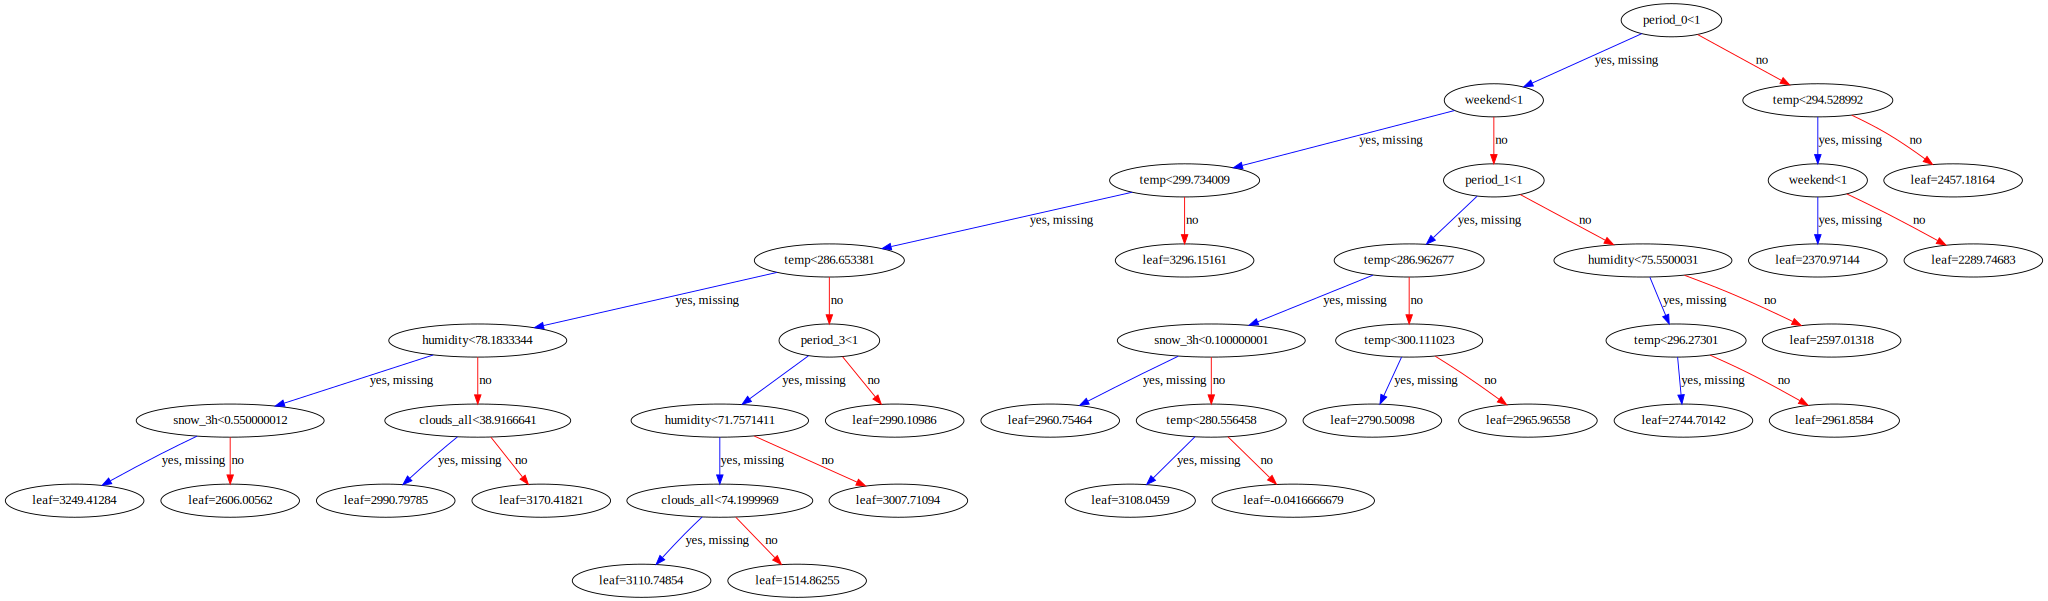

In [ ]:
xgb.to_graphviz(model_xgb2)

[0.00722361 0.00506828 0.00687614 0.00456319 0.00429588 0.00466197
 0.00660151 0.01122908 0.0056904  0.1188392  0.78831875 0.02053688
 0.00837483 0.00772025]


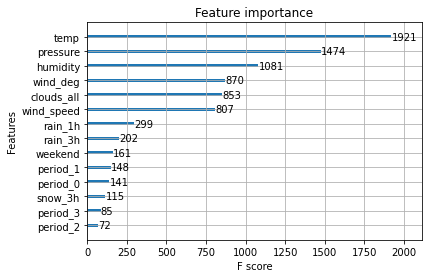

In [ ]:
# feature importance
print(model_xgb2.feature_importances_)
# plot feature importance
plot_importance(model_xgb2)
pyplot.show()

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# model_tree = DecisionTreeClassifier(max_depth=5,criterion='entropy')
# model_tree.fit(x_train,y_train)
# y_pred=model_tree.predict(x_test)

In [ ]:
# y_pred=model_tree.predict(x_test)
# print('R2:',model_tree.score(x_test, y_test))
# print('訓練的R2:',model_tree.score(x_train, y_train))
# print('MAPE: ',mean_absolute_percentage_error(y_test, y_pred))
# print('MAE: ',mean_absolute_error(y_test, y_pred))

In [ ]:
# from sklearn.tree import export_graphviz
# export_graphviz(model_tree, out_file = 'tree_decision_classifier.dot',)
# from subprocess import call
# call(['dot','-Tpng','tree_decision_classifier.dot','-o','tree_decision_classifier.png','-Gdpi=600'])

# from IPython.display import Image
# Image(filename = 'tree_decision_classifier.png')

In [ ]:
feature_all_z

,temp_min,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weekend,period_0,period_1,period_2,period_3
0,-2.233327,-0.019986,0.952521,-0.344346,-0.546409,-0.361436,-0.114789,-0.047937,-1.429373,0,1,0,0,0
1,-2.230345,-0.020060,0.952521,-0.344346,-0.535973,-0.361436,-0.114789,-0.047937,-1.429373,0,1,0,0,0
2,-2.288416,-0.019837,0.925657,-0.049737,-0.828184,-0.361436,-0.114789,-0.047937,-1.429373,0,1,0,0,0
3,-2.289773,-0.019911,0.925657,-0.049737,-0.824705,-0.361436,-0.114789,-0.047937,-1.429373,0,1,0,0,0
4,-2.281850,-0.019911,0.925657,-0.049737,-0.838620,-0.361436,-0.114789,-0.047937,-1.429373,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,-0.708625,-0.015231,0.361518,-0.786260,-0.264634,-0.361436,-0.114789,-0.047937,-1.429373,0,0,0,0,1
35060,-1.045621,-0.014934,-0.014574,-0.491650,-0.108093,-0.361436,-0.114789,-0.047937,-1.429373,0,0,0,0,1
35061,-1.129870,-0.015008,0.213767,0.097568,1.032921,-0.361436,-0.114789,-0.047937,-1.429373,0,0,0,0,1
35062,-1.354534,-0.014860,0.119744,0.244872,1.102495,-0.361436,-0.114789,-0.047937,-1.429373,0,0,0,0,1


In [ ]:
#預測2018/1/1至2018/1/10每小時之用電量
t=df_use['time'].between('2017-05-01 00:00:00+01:00','2017-05-10 23:00:00+01:00')
x_2017_z=feature_all_z[t]
x_2017_z
x_2017=feature_all[t]
y=df_use.total_load_actual[t]
y

20423    28002.0
20424    25528.0
20425    24080.0
20426    23359.0
20427    23152.0
          ...   
20657    31919.0
20658    32101.0
20659    34060.0
20660    33204.0
20661    30095.0
Name: total_load_actual, Length: 239, dtype: float64

In [ ]:
x_2017_z_pick=x_2017_z[x_pick.columns]
x_2017_z_pick

,temp,humidity,weekend,period_0,period_1,period_2,period_3
20423,-0.403277,0.428677,1,0,0,0,1
20424,-0.523647,0.468973,0,1,0,0,0
20425,-0.609586,0.495837,0,1,0,0,0
20426,-0.527962,0.679406,0,1,0,0,0
20427,-0.799368,0.898793,0,1,0,0,0
...,...,...,...,...,...,...,...
20657,0.700157,-0.484690,0,0,0,1,0
20658,0.651403,-0.350371,0,0,0,0,1
20659,0.477873,-0.148893,0,0,0,0,1
20660,0.380640,0.334654,0,0,0,0,1


In [ ]:
x_2017_z

,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weekend,period_0,period_1,period_2,period_3
20423,-0.403277,-0.020803,0.428677,0.392177,0.754625,-0.065226,-0.114789,-0.047937,0.870343,1,0,0,0,1
20424,-0.523647,-0.020654,0.468973,0.244872,0.615477,-0.361436,-0.114789,-0.047937,-0.735991,0,1,0,0,0
20425,-0.609586,-0.020357,0.495837,0.244872,1.241643,-0.361436,-0.114789,-0.047937,-0.273736,0,1,0,0,0
20426,-0.527962,-0.020010,0.679406,-0.221592,0.783614,-0.361436,-0.114789,-0.047937,0.072954,0,1,0,0,0
20427,-0.799368,-0.019986,0.898793,-0.491650,0.337181,-0.361436,-0.114789,-0.047937,-1.198245,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20657,0.700157,-0.025112,-0.484690,2.454441,0.163246,-0.361436,-0.114789,-0.047937,0.419645,0,0,0,1,0
20658,0.651403,-0.025112,-0.350371,2.012527,0.163246,-0.361436,-0.114789,-0.047937,0.419645,0,0,0,0,1
20659,0.477873,-0.025409,-0.148893,1.570613,-0.080263,0.527195,-0.114789,-0.047937,0.188518,0,0,0,0,1
20660,0.380640,-0.025483,0.334654,1.128700,-1.158660,-0.361436,-0.114789,-0.047937,0.650773,0,0,0,0,1


In [ ]:
y_pred_knr = knr.predict(x_2017_z)
r2 = r2_score(y, y_pred_knr)
mse = mean_squared_error(y, y_pred_knr)
print('以所有特徵做:')
print('R2: ', r2)
print('MSE: ', mse)
print('MAPE: ',mean_absolute_percentage_error(y, y_pred_knr))
print('MAE: ',mean_absolute_error(y, y_pred_knr))
print()

以所有特徵做:
R2:  0.5503053886792664
MSE:  6690253.009762902
MAPE:  0.0665563057678857
MAE:  1906.234309623431



In [ ]:
y_pred_knr2 = knr3.predict(x_2018_z_pick)
r2 = r2_score(y, y_pred_knr2)
mse = mean_squared_error(y, y_pred_knr2)
print('以所有特徵做:')
print('R2: ', r2)
print('MSE: ', mse)
print('MAPE: ',mean_absolute_percentage_error(y, y_pred_knr2))
print('MAE: ',mean_absolute_error(y, y_pred_knr2))
print()

以所有特徵做:
R2:  0.5757306991546702
MSE:  6961940.982471389
MAPE:  0.07078136717064318
MAE:  1915.147327249022



In [ ]:
y_pred_knr3 = model3.predict(x_2018_z_pick)
r2 = r2_score(y, y_pred_knr3)
mse = mean_squared_error(y, y_pred_knr3)
print('以挑選特徵做:')
print('R2: ', r2)
print('MSE: ', mse)
print('MAPE: ',mean_absolute_percentage_error(y, y_pred_knr3))
print('MAE: ',mean_absolute_error(y, y_pred_knr3))
print()

以所有特徵做:
R2:  0.4249867179776601
MSE:  9435536.640526587
MAPE:  0.0892043894906037
MAE:  2350.2222622710183



In [ ]:
x_2017

,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weekend,period_0,period_1,period_2,period_3
20447,286.8720,1020.6,73.6,0.6,84.0,0.00,0.0,0.0,22.2,0,0,0,0,1
20448,286.0580,1020.6,75.2,0.6,135.4,0.00,0.0,0.0,18.4,0,1,0,0,0
20449,285.0960,1020.4,76.4,1.0,128.0,0.00,0.0,0.0,18.4,0,1,0,0,0
20450,284.3280,1020.4,78.4,1.2,140.0,0.00,0.0,0.0,0.0,0,1,0,0,0
20451,283.7220,1019.8,82.4,1.4,189.8,0.00,0.0,0.0,4.0,0,1,0,0,0
20452,283.5640,1019.8,82.4,0.6,68.0,0.00,0.0,0.0,13.6,0,1,0,0,0
20453,283.1840,1019.6,86.0,0.6,136.2,0.00,0.0,0.0,15.0,0,1,0,0,0
20454,283.2600,1019.6,85.8,0.8,115.2,0.00,0.0,0.0,15.0,0,0,1,0,0
20455,283.8160,1019.6,88.2,1.2,113.8,0.00,0.0,0.0,15.0,0,0,1,0,0
20456,285.6320,1019.8,80.2,0.6,71.6,0.06,0.0,0.0,15.0,0,0,1,0,0


In [ ]:
y_pred_xgb = model_xgb2.predict(x_2017)
r2 = r2_score(y, y_pred_xgb)
mse = mean_squared_error(y, y_pred_xgb)
print('R2: ', r2)
print('MSE: ', mse)
print('MAPE: ',mean_absolute_percentage_error(y, y_pred_xgb))
print('MAE: ',mean_absolute_error(y, y_pred_xgb))
print()

R2:  -0.24788528545201327
MSE:  12467675.91637371
MAPE:  0.11986109118204455
MAE:  2994.263671875



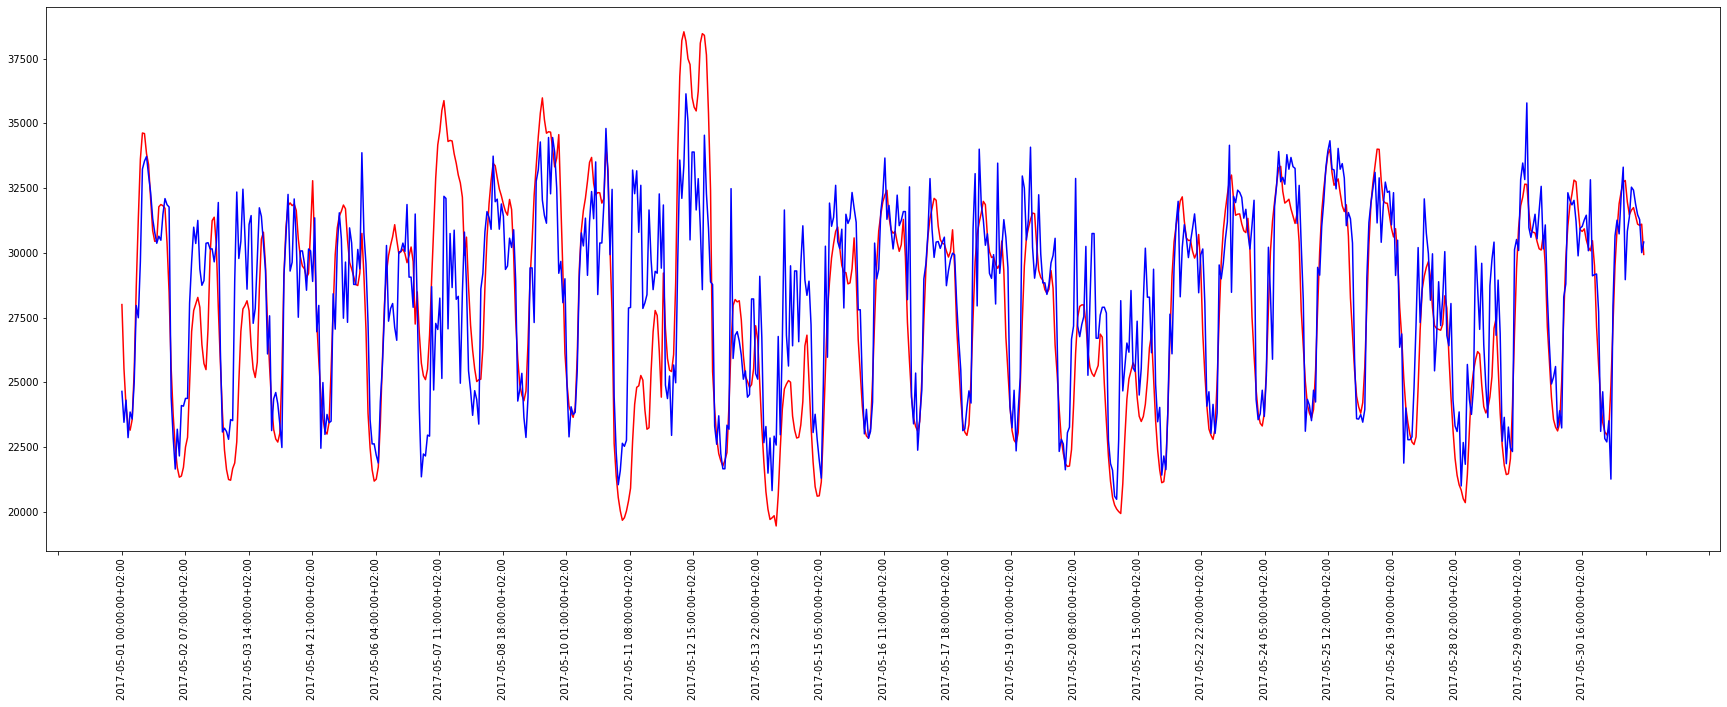

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec # 畫圖網格佈局
import pandas, numpy
import matplotlib.ticker as mticker
from matplotlib import pyplot
import datetime

# 開新一個畫布
fig = plt.figure(figsize=(30, 10)) # 寬10 長8
gs = GridSpec(1, 1) # 設立1x1的網格

# 設定網格及子圖
ax = plt.subplot(gs[0, 0]) # 子圖ax在網格的[0, 0]


# 畫圖
ax.plot(df_use.time[t], y ,color='r')
ax.plot(df_use.time[t],y_pred_knr,color='b')
#ax.plot(df_use.time[t],y_pred_knr2,color='g')
#ax.plot(df_use.time[t],y_pred_knr3,color='y')
#ax.plot(df_use.time[t],y_pred_xgb,color='g')

plt.xticks(rotation=90)
# 圖調整
tick_spacing = df_use.time[t].size/24 # x軸密集度
ax.xaxis.set_major_locator(mticker.MultipleLocator(tick_spacing))

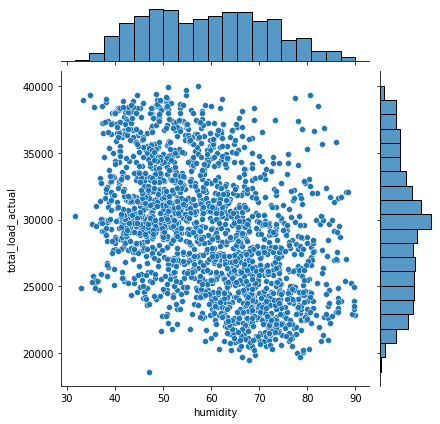

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt




sns.jointplot(x = "humidity", y = "total_load_actual", data = df_use[4000:6000])

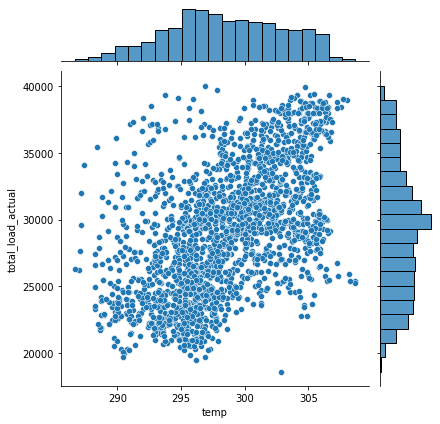

In [ ]:
sns.jointplot(x = "temp", y = "total_load_actual", data = df_use[4000:6000])

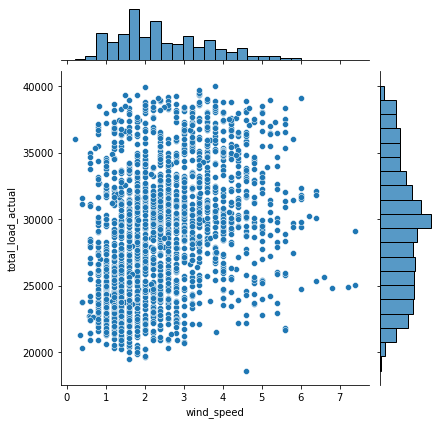

In [ ]:
sns.jointplot(x = "wind_speed", y = "total_load_actual", data = df_use[4000:6000])

In [ ]:
energy = pd.read_csv('/energy.csv')

In [ ]:
energy

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total_load_actual,price_day_ahead,price_actual,re_new,not_renew,total
0,2017-05-01 00:00:00+02:00,359,919,0,4689,6387,304,0,0,0,...,13,NaN,7192,27602,28002,51.22,45.13,8869,20078,28947
1,2017-05-01 01:00:00+02:00,361,893,0,4585,6041,304,0,0,0,...,4,NaN,7099,25217,25528,48.41,39.89,8970,19603,28573
2,2017-05-01 02:00:00+02:00,359,909,0,4590,6019,299,0,0,0,...,3,NaN,7274,23626,24080,50.00,37.82,9925,19582,29507
3,2017-05-01 03:00:00+02:00,353,923,0,4475,5710,295,0,0,0,...,9,NaN,7367,22992,23359,47.46,39.62,10565,19162,29727
4,2017-05-01 04:00:00+02:00,355,913,0,4450,4930,293,0,0,0,...,13,NaN,7047,22903,23152,42.34,42.05,11559,18354,29913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2017-05-31 19:00:00+02:00,337,836,0,6502,6605,320,0,0,0,...,2568,NaN,3576,30302,31108,54.48,60.27,8906,19953,28859
740,2017-05-31 20:00:00+02:00,337,867,0,6411,6521,318,0,0,0,...,1595,NaN,3792,30255,31060,55.02,60.70,8632,19824,28456
741,2017-05-31 21:00:00+02:00,338,849,0,6631,6568,319,0,0,0,...,904,NaN,3803,30834,31107,56.30,62.69,8144,20086,28230
742,2017-05-31 22:00:00+02:00,336,847,0,6753,6552,321,0,0,0,...,626,NaN,3885,29737,29938,54.80,61.01,7461,20188,27649


In [ ]:
df=energy[energy['time'].between('2017-05-01 00:00:00+01:00','2017-05-10 23:00:00+01:00')]

In [ ]:
df

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total_load_actual,price_day_ahead,price_actual,re_new,not_renew,total
0,2017-05-01 00:00:00+02:00,359,919,0,4689,6387,304,0,0,0,...,13,NaN,7192,27602,28002,51.22,45.13,8869,20078,28947
1,2017-05-01 01:00:00+02:00,361,893,0,4585,6041,304,0,0,0,...,4,NaN,7099,25217,25528,48.41,39.89,8970,19603,28573
2,2017-05-01 02:00:00+02:00,359,909,0,4590,6019,299,0,0,0,...,3,NaN,7274,23626,24080,50.00,37.82,9925,19582,29507
3,2017-05-01 03:00:00+02:00,353,923,0,4475,5710,295,0,0,0,...,9,NaN,7367,22992,23359,47.46,39.62,10565,19162,29727
4,2017-05-01 04:00:00+02:00,355,913,0,4450,4930,293,0,0,0,...,13,NaN,7047,22903,23152,42.34,42.05,11559,18354,29913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2017-05-10 18:00:00+02:00,350,624,0,11360,4845,341,0,0,0,...,2675,NaN,5569,31786,31919,55.03,51.24,9734,23749,33483
235,2017-05-10 19:00:00+02:00,348,636,0,12736,4879,345,0,0,0,...,1288,NaN,6251,31822,32101,60.15,54.94,8705,25177,33882
236,2017-05-10 20:00:00+02:00,346,626,0,13281,4991,346,0,0,0,...,609,NaN,6526,33954,34060,62.07,56.91,8982,25830,34812
237,2017-05-10 21:00:00+02:00,352,602,0,12039,4938,346,0,0,0,...,438,NaN,6950,32882,33204,59.70,60.20,8860,24527,33387


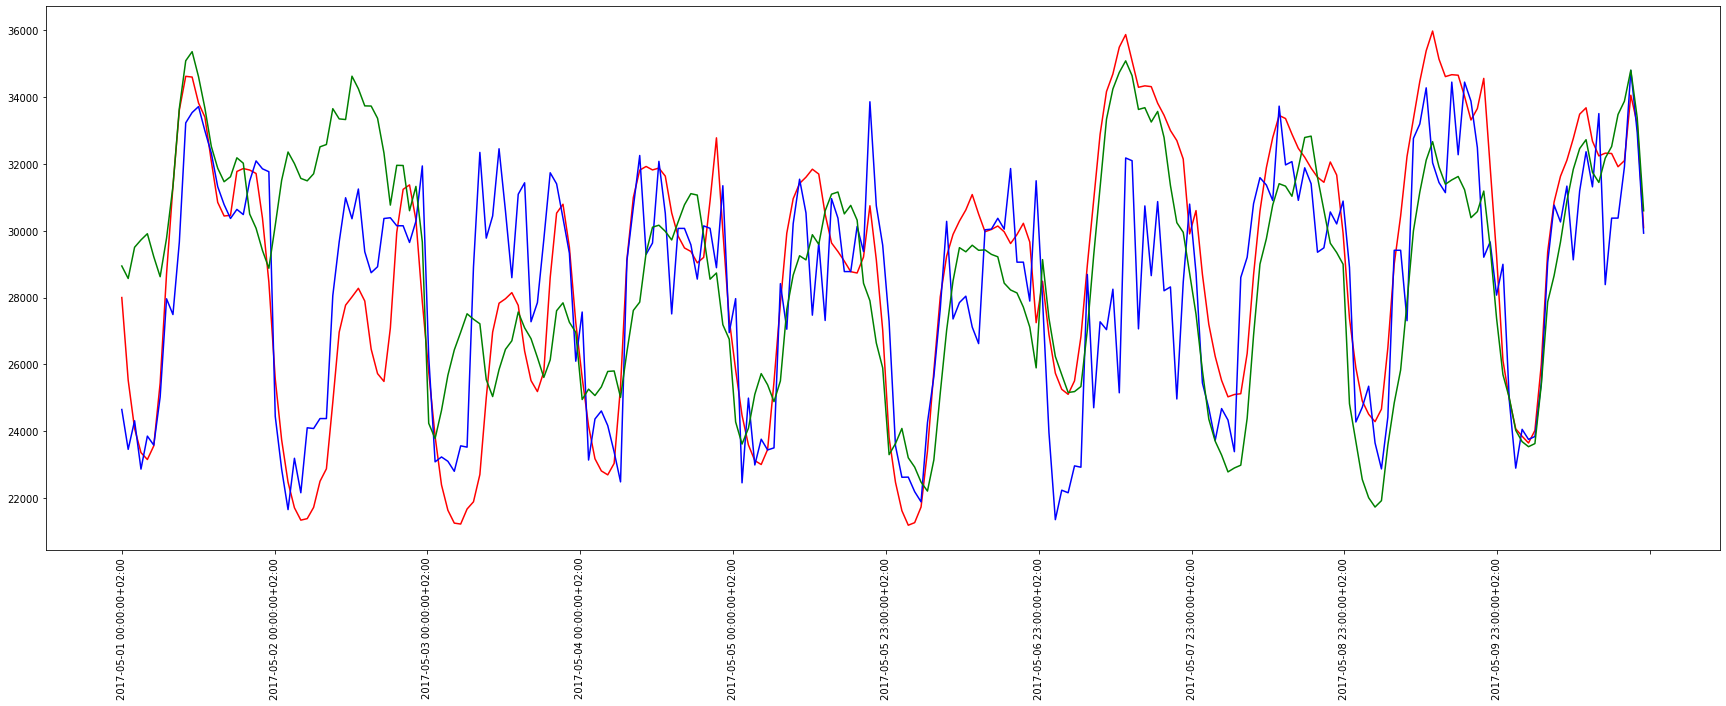

In [ ]:
# 開新一個畫布
fig = plt.figure(figsize=(30, 10)) # 寬10 長8
gs = GridSpec(1, 1) # 設立1x1的網格

# 設定網格及子圖
ax = plt.subplot(gs[0, 0]) # 子圖ax在網格的[0, 0]


# 畫圖
ax.plot(df_use.time[t], y ,color='r')
ax.plot(df_use.time[t],y_pred_knr,color='b')
ax.plot(df_use.time[t],df.total,color='g')
#ax.plot(df_use.time[t],y_pred_knr3,color='y')
#ax.plot(df_use.time[t],y_pred_xgb,color='g')

plt.xticks(rotation=90)
# 圖調整
tick_spacing = df_use.time[t].size/10 # x軸密集度
ax.xaxis.set_major_locator(mticker.MultipleLocator(tick_spacing))